## 1. Load the data 

In [1]:
# %%bash
# pip install pandas

In [1]:
import os
import numpy as np
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split

from bs4 import BeautifulSoup
# The package comes built-in with Python
import re
# http://www.nltk.org/install.html
import nltk

from nltk.corpus import stopwords # Import the stop word list
stops = set(stopwords.words("english"))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

from sklearn.grid_search import GridSearchCV
from sklearn import svm

from sklearn.ensemble import BaggingClassifier

/Users/andrej/.virtualenvs/summer/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/andrej/.virtualenvs/summer/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Import statements
import pandas as pd 
import os

In [3]:
pwd = "/Users/andrej/Documents/Mine/Zemanta/Zemanta-Data-Science-Summer-School"
os.chdir(pwd)

In [374]:
# Read the training data in pandas dataframe
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
df_train = pd.read_csv("data/workshop_train.csv")

In [4]:
from sklearn.model_selection import train_test_split
# df_train, df_validate = train_test_split(df_train, test_size=0.2)

In [5]:
# Let's have a look at the dataset
df_train.head()

,id,sentiment,review
3346,9189_1,0,This movie has received a lot of bad press fro...
2485,2327_3,0,This motion picture comes straight out of the ...
760,6249_7,1,Hundstage is an intentionally ugly and unnervi...
3742,12191_7,1,The Lady From Shanghai is weird even by the st...
9790,11645_2,0,This is a review of 'Freddy Mercury The Untold...


In [6]:
df_train.shape

(10093, 3)

In [7]:
df_train.columns

Index([u'id', u'sentiment', u'review'], dtype='object')

In [8]:
df_train = df_train[['sentiment','review']]

In [9]:
df_train.columns

Index([u'sentiment', u'review'], dtype='object')

In [10]:
df_train.head()

,sentiment,review
3346,0,This movie has received a lot of bad press fro...
2485,0,This motion picture comes straight out of the ...
760,1,Hundstage is an intentionally ugly and unnervi...
3742,1,The Lady From Shanghai is weird even by the st...
9790,0,This is a review of 'Freddy Mercury The Untold...


In [11]:
# Let's have a look at the reviews
df_train.review.values[1]

'This motion picture comes straight out of the dark dungeon of Full Moon Entertainment. This production company gained fame and fortune during the first half of the 90\'s by producing terribly bad and cheesy horror movies. The most famous disasters in their ouvre are \\Subspecies\\", \\"Seedpeople\\" and \\"Trancers\\". None of these are recommended and neither is Doctor Mordrid, actually. Hyperactive director Charles Band did come to the right company for his film. Doctor Mordrid is amazingly dumb and cheesy and almost completely humourless. I only saw it because it stars Jeffrey Combs. I learned that it can have several disadvantages if you\'re a fan of him. For every good movie, it seems like he has made 5 inferior ones. Anyways, the story is about the battle between 2 ancient sorcerers. One good one who\'s here since 150 years to protect the humans ( Jeffrey as Dr.Mordrid ) and one wicked one called Kabal. He wants to destroy every form of human life for some reason I already forgo

In [12]:
# Distribution of the examples
pd.value_counts(df_train.sentiment)

0    5087
1    5006
Name: sentiment, dtype: int64

## 2. Data Preprocessing & Visualization

In [13]:
# %%bash
# pip install BeautifulSoup4
# pip install -U nltk

In [4]:
from bs4 import BeautifulSoup 
# The package comes built-in with Python
import re
# http://www.nltk.org/install.html
import nltk 

In [5]:
# Download text data sets, including stop words
# nltk.download()

In [6]:
from nltk.corpus import stopwords # Import the stop word list
stops = set(stopwords.words("english"))

In [7]:
# Pre-processing step
def text_to_words(raw_text):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_text).get_text() 

    # 2. Remove non-letters
    # Find anything that is NOT a lowercase letter (a-z) or an upper case letter (A-Z), and replace it with a space
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))
    
    # There are many other things we could do to the data
    # For example, Porter Stemming and Lemmatizing (both available in NLTK) 
    # would allow us to treat "messages", "message", and "messaging" as the same word
    # which could certainly be useful.
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    clear_text = " ".join(meaningful_words)
    return clear_text
    #validate_text_sentiment["Message"][i] = clear_text 
    #print i
    #return( " ".join( meaningful_words ))  

In [16]:
# Use the apply function in pandas to apply the function
# axis = 1 specifier means that the application is done at a row than a column level
df_train['cleaned_text'] = df_train.apply (lambda row: text_to_words(row.review), axis=1)

/Users/andrej/.virtualenvs/summer/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 162 of the file /System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [17]:
df_train.head()

,sentiment,review,cleaned_text
3346,0,This movie has received a lot of bad press fro...,movie received lot bad press people understand...
2485,0,This motion picture comes straight out of the ...,motion picture comes straight dark dungeon ful...
760,1,Hundstage is an intentionally ugly and unnervi...,hundstage intentionally ugly unnerving study l...
3742,1,The Lady From Shanghai is weird even by the st...,lady shanghai weird even standards eminent dir...
9790,0,This is a review of 'Freddy Mercury The Untold...,review freddy mercury untold story theatrical ...


In [18]:
df_train.to_csv("data/cleaned_train.csv",index=False)

## Visualization

In [21]:
# %%bash
# pip install wordcloud 

In [19]:
# conda install -c conda-forge wordcloud
# http://amueller.github.io/word_cloud/index.html
from wordcloud import WordCloud,STOPWORDS
# Import plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Word cloud for positive words


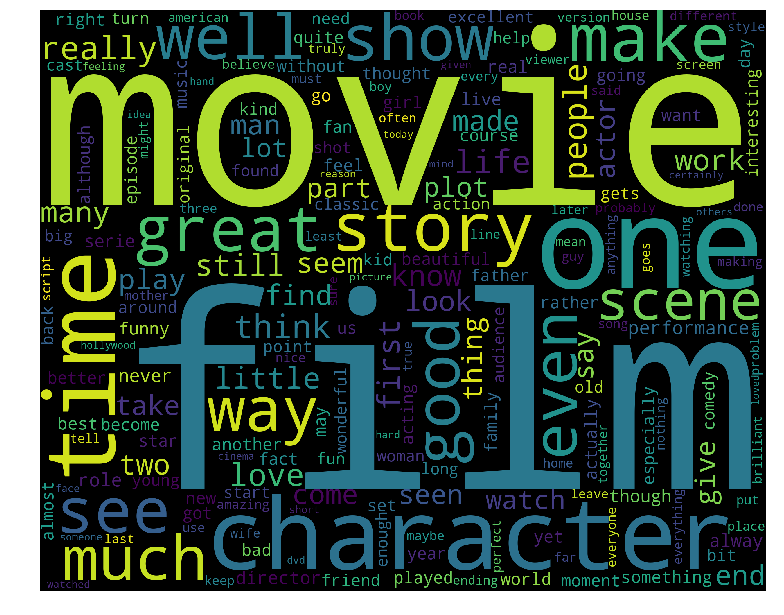

In [21]:
print "Word cloud for positive words"
wordcloud_draw(df_train[(df_train.sentiment==1)]['cleaned_text'])

Word cloud for negative words


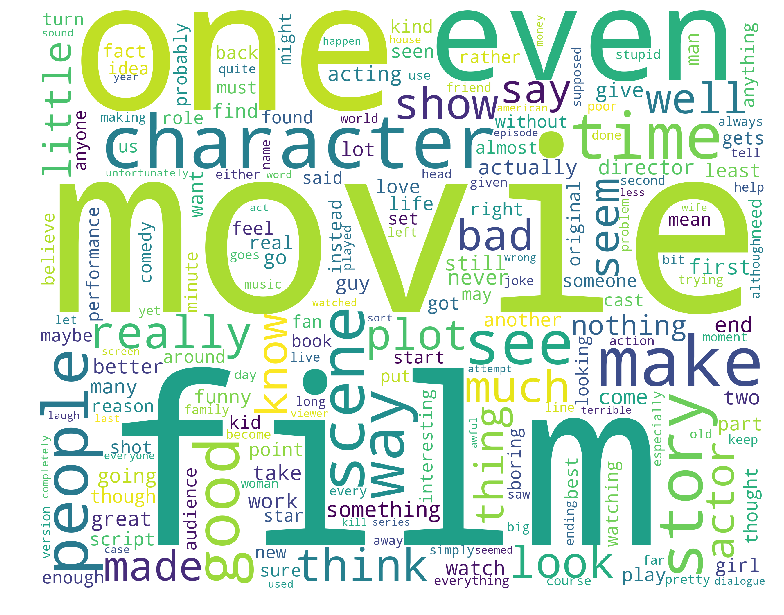

In [22]:
print "Word cloud for negative words"
wordcloud_draw(df_train[(df_train.sentiment==0)]['cleaned_text'], color = 'white')

## 3. Text Vectorization

In [12]:
# CountVectorizer is scikit-learn's bag of words tool
from sklearn.feature_extraction.text import CountVectorizer

In [280]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# analyzer = "word" specifies that the feature should be made of word
# To limit the size of the feature vectors, we should choose some maximum vocabulary size. 
# Below, we use the 5000 most frequent words.
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
vectorizer = CountVectorizer(analyzer = analyze, tokenizer = None, preprocessor = None, stop_words = None, 
                             max_features = 3000) 

In [281]:
# fit_transform() does two functions: First, it fits the model and learns the vocabulary; 
# second, it transforms our training data into feature vectors. 
# The input to fit_transform should be a list of strings.
train_data_features = vectorizer.fit_transform(df_train['cleaned_text'].values.astype('U'))

In [282]:
# The result of the above operation is a sparse matrix
train_data_features

<10093x3000 sparse matrix of type '<type 'numpy.int64'>'
	with 747310 stored elements in Compressed Sparse Row format>

In [283]:
print train_data_features.shape

(10093, 3000)


In [284]:
# Numpy arrays are easy to work with, so convert the result to an array
train_data_features = train_data_features.toarray()

In [285]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print vocab[0:10]

[u'abandoned', u'ability', u'able', u'absolute', u'absolutely', u'absurd', u'abuse', u'academy', u'accent', u'accents']


In [286]:
# We can also print the counts of each word in the vocabulary
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)
print dist

[ 77 156 503 ... 153 324 224]


In [287]:
dist.sort()
dist

array([   68,    68,    68, ..., 10910, 16326, 17787])

In [288]:
# For each, print the vocabulary word and the number of times it appears in the training set
# for tag, count in zip(vocab, dist):
#     print count, tag

In [178]:
print train_data_features[0]

[0 0 0 ... 0 0 0]


In [114]:
reverse_vocab = {v: k for k, v in vectorizer.vocabulary_.iteritems()}
# print reverse_vocab 

In [36]:
# # Convert vectors to text
# text = ''
# for i in range(0, len(vec)):
#     if vec[i] != 0:
#         text = text + ' ' + reverse_vocab.get(i)
# print text

In [62]:
# vec = vectorizer.transform([df_train['cleaned_text'][0]]).toarray()
# # print df_train['cleaned_text'][0]

### Different techniques for Text Vectoriation

### Bigram Model

In [151]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 3), token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
# analyze('Bi-grams are cool!') == (['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])
analyze('Bi-grams are cool!')

[u'bi',
 u'grams',
 u'are',
 u'cool',
 u'bi grams',
 u'grams are',
 u'are cool',
 u'bi grams are',
 u'grams are cool']

### TfidfVectorizer

In [66]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
# tfidf = transformer.fit_transform(df_train['cleaned_text'].values.astype('U'))

# 5. Apply Machine Learning Algorithms

## [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html)

In [67]:
from sklearn.naive_bayes import GaussianNB

In [289]:
y_actual = df_train.sentiment.values

In [290]:
nb_model = GaussianNB().fit(train_data_features, y_actual)

In [291]:
# nb_model.predict(?)

In [292]:
df_test = pd.read_csv("data/workshop_test.csv")

In [293]:
df_test['cleaned_text'] = df_test.apply (lambda row: text_to_words(row.review), axis=1)
test_data_features = vectorizer.transform(df_test['cleaned_text'].values.astype('U'))
test_data_features = test_data_features.toarray()

In [294]:
predictions = nb_model.predict(test_data_features)

In [295]:
print predictions[0:10]

[0 0 1 0 0 1 1 0 0 0]


In [296]:
df_test['nb_prediction'] = predictions

In [297]:
df_test.to_csv("results/test_prediction.csv", index=False)

# Performance Metrics

## Accuracy

In [230]:
from sklearn.metrics import accuracy_score
y_pred = nb_model.predict(train_data_features)
y_true = df_train['sentiment']

In [231]:
print 'Accuracy of the algorithm is %f' %(accuracy_score(y_true, y_pred))

Accuracy of the algorithm is 0.867928


## Precision

In [232]:
from sklearn.metrics import precision_score
print 'Precison of the algorithm is %f' %(precision_score(y_true, y_pred))

Precison of the algorithm is 0.944781


## Recall

In [233]:
from sklearn.metrics import recall_score
print 'Recall of the algorithm is %f' %(recall_score(y_true, y_pred))

Recall of the algorithm is 0.779265


## F1-score

In [234]:
from sklearn.metrics import f1_score
print 'F1-score of the algorithm is %f' %(f1_score(y_true, y_pred))

F1-score of the algorithm is 0.854078


## Classification Report

In [14]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_true, y_pred, target_names=target_names))

NameError: name 'y_true' is not defined

## Confusion Matrix

In [298]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print tn, fp, fn, tp

1081 163 351 929


In [299]:
df_validate['cleaned_text'] = df_validate.apply (lambda row: text_to_words(row.review), axis=1)
validate_data_features = vectorizer.transform(df_validate['cleaned_text'].values.astype('U'))
validate_data_features = validate_data_features.toarray()

In [300]:
y_pred = nb_model.predict(validate_data_features)
y_true = df_validate.sentiment.values
print 'Accuracy of the algorithm is %f' %(accuracy_score(y_true, y_pred))

Accuracy of the algorithm is 0.805468


In [301]:
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81      1244
          1       0.85      0.75      0.80      1280

avg / total       0.81      0.81      0.81      2524



In [148]:
testDF = df_validate.iloc[:2]
testDF['cleaned_text'] = ['This is a super good great best movie I ever saw', 'This is a very bad movie']
test_validate_data_features = vectorizer.transform(testDF['cleaned_text'].values.astype('U'))
test_validate_data_features = test_validate_data_features.toarray()

test_y_pred = nb_model.predict(test_validate_data_features)

test_y_pred

/Users/andrej/.virtualenvs/summer/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([0, 0])

## 6. Cross-Validation & Hyperparameter Tuning

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
# Random Forest classifier with 10 trees
forest = RandomForestClassifier(n_estimators = 10)

In [93]:
# 10-fold Cross-Validation using Grid Search 
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

/Users/andrej/.virtualenvs/summer/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [94]:
# scoring = ['precision_macro', 'recall_macro', 'f1_macro']
param_grid = {'n_estimators': [10, 5]}

In [95]:
from sklearn.grid_search import GridSearchCV
grid_clf = GridSearchCV(forest, param_grid, cv=3, scoring='precision_macro')

/Users/andrej/.virtualenvs/summer/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [96]:
grid_clf.fit(train_data_features, df_train['sentiment'].values)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 5]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='precision_macro', verbose=0)

In [97]:
# Get the best model
best_model = grid_clf.best_estimator_

In [98]:
# Get the value of the hyperparameters for best model
print grid_clf.best_params_

{'n_estimators': 10}


In [99]:
grid_clf = GridSearchCV(forest, param_grid, cv=10, scoring='precision_macro', n_jobs = -1)
grid_clf.fit(train_data_features, df_train['sentiment'].values)
best_model = grid_clf.best_estimator_

In [100]:
predictions = best_model.predict(test_data_features)

In [101]:
df_test['rf_prediction'] = predictions

In [102]:
df_test.to_csv("results/test_prediction.csv", index=False)

In [103]:
df_test.head()

,id,review,cleaned_text,nb_prediction,rf_prediction
0,8348_2,This movie is a disaster within a disaster fil...,movie disaster within disaster film full great...,0,0
1,5828_4,"All in all, this is a movie for kids. We saw i...",movie kids saw tonight child loved one point k...,0,1
2,7186_2,Afraid of the Dark left me with the impression...,afraid dark left impression several different ...,0,1
3,4396_1,This has to be one of the biggest misfires eve...,one biggest misfires ever script nice could en...,0,0
4,395_2,"This is one of those movies I watched, and won...",one movies watched wondered watch find interes...,0,0


## Model Ensembles

In [606]:
from sklearn import svm
from sklearn.ensemble import BaggingClassifier

In [70]:
# https://en.wikipedia.org/wiki/Radial_basis_function_kernel
svm_rbf = svm.SVC(C = 1, gamma = 0.001, kernel='rbf')

In [71]:
n_estimators = 10
svm_rbf_ensemble = BaggingClassifier(svm_rbf, max_samples=1.0 / n_estimators, 
                            n_estimators=n_estimators)

In [72]:
model = svm_rbf_ensemble.fit(train_data_features, df_train["sentiment"])

In [73]:
predictions = model.predict(test_data_features)

In [74]:
df_test['svm_ensemble_prediction'] = predictions

In [75]:
# df_test.to_csv("results/test_prediction.csv", index=False)

## Boosted trees

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

## Model

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os

pwd = "/Users/andrej/Documents/Mine/Zemanta/Zemanta-Data-Science-Summer-School"
os.chdir(pwd)

In [9]:
df_train = pd.read_csv("data/task_train.csv")
df_train['cleaned_text'] = df_train.apply (lambda row: text_to_words(row.review), axis=1)

/Users/andrej/.virtualenvs/summer/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 162 of the file /System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [10]:
df_train1, df_validate1 = train_test_split(df_train, test_size=0.2)

In [11]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
vectorizer = CountVectorizer(analyzer = analyze, tokenizer = None, preprocessor = None, stop_words = None, 
                             max_features = 10000)

# from sklearn.feature_extraction.text import TfidfTransformer
# transformer = TfidfTransformer(smooth_idf=False)

In [12]:
train_data_features = vectorizer.fit_transform(df_train1['cleaned_text'].values.astype('U'))

In [13]:
train_data_features = train_data_features.toarray()

In [15]:
y_actual = df_train.sentiment.values

In [31]:
dist = np.sum(train_data_features, axis=0)

dist.sort()
print dist

[   15    15    15 ...  8285 12802 13800]


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

def testModel(model, maxFeatures=3000, ngram=2):
    bigram_vectorizer = CountVectorizer(ngram_range=(1, ngram), token_pattern=r'\b\w+\b', min_df=1)
    analyze = bigram_vectorizer.build_analyzer()
    vectorizer = CountVectorizer(analyzer = analyze, tokenizer = None, preprocessor = None, stop_words = None, 
                                 max_features = maxFeatures)
    
    df_train1, df_validate1 = train_test_split(df_train, test_size=0.2)
    train_data_features = vectorizer.fit_transform(df_train1['cleaned_text'].values.astype('U'))
    train_data_features = train_data_features.toarray()
    
    model.fit(train_data_features, df_train1['sentiment'].values)
    
    test_data_features = vectorizer.transform(df_validate1['cleaned_text'].values.astype('U'))
    test_data_features = test_data_features.toarray()
    
    target_names = ['0', '1']
    print(classification_report(df_validate1['sentiment'], model.predict(test_data_features), target_names=target_names))
    

### Test Models

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# svm.NuSVC()
# model = svm.SVC(C = 1, gamma = 0.001, kernel='rbf') # ngram=1, maxFeatures = 7000: 0.86
# RandomForestClassifier(n_estimators=100, max_features=10 )
model=RandomForestClassifier(n_estimators=100, max_features=30 )
for i in range(4):
    if (i < 2):
        testModel(model, ngram=2, maxFeatures=15000)
    else:
        testModel(model, ngram=2, maxFeatures=9000)

             precision    recall  f1-score   support

          0       0.86      0.85      0.85       959
          1       0.86      0.87      0.86      1007

avg / total       0.86      0.86      0.86      1966

             precision    recall  f1-score   support

          0       0.86      0.82      0.84       997
          1       0.82      0.86      0.84       969

avg / total       0.84      0.84      0.84      1966

             precision    recall  f1-score   support

          0       0.84      0.84      0.84      1002
          1       0.84      0.83      0.83       964

avg / total       0.84      0.84      0.84      1966

             precision    recall  f1-score   support

          0       0.83      0.86      0.84       969
          1       0.86      0.83      0.84       997

avg / total       0.84      0.84      0.84      1966



### Build Model

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [13]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
vectorizer = CountVectorizer(analyzer = analyze, tokenizer = None, preprocessor = None, stop_words = None, 
                             max_features = 10000)

train_data_features = vectorizer.fit_transform(df_train['cleaned_text'].values.astype('U'))
train_data_features = train_data_features.toarray()

model.fit(train_data_features, df_train['sentiment'].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
## export

df_test = pd.read_csv("data/task_test.csv")

df_test['cleaned_text'] = df_test.apply (lambda row: text_to_words(row.review), axis=1)
test_data_features = vectorizer.transform(df_test['cleaned_text'].values.astype('U'))
test_data_features = test_data_features.toarray()

df_test['predicted sentiment'] = model.predict(test_data_features)
df_test[['id', 'predicted sentiment']].to_csv("results/task_test_predicted.csv",index=False)

In [19]:
df_test[['id', 'predicted sentiment']].head()

,id,predicted sentiment
0,7166_2,0
1,6811_10,1
2,1119_1,0
3,9011_9,1
4,12106_10,1


### Bayes

In [14]:
from sklearn.linear_model import LogisticRegression

param_grid = {}
grid_clf = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='f1', n_jobs=-1)

In [ ]:
grid_clf.fit(train_data_features, df_train1['sentiment'].values)
best_model = grid_clf.best_estimator_

In [ ]:
print grid_clf.best_score_
print grid_clf.best_params_

In [649]:
test_data_features = vectorizer.fit_transform(df_validate1['cleaned_text'].values.astype('U'))
test_data_features = test_data_features.toarray()

In [ ]:
print(classification_report(df_validate1['sentiment'], grid_clf.predict(test_data_features), target_names=target_names))

### Forest

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
forest = RandomForestClassifier(n_estimators=100, max_features=10 )
# forest = GradientBoostingClassifier()

# param_grid = {'n_estimators': [200], 'max_features': [25,26,27, 28, 29, 30]}
param_grid = {'n_estimators': [100], 'max_features': range(10,50,10)}
grid_clf = GridSearchCV(forest, param_grid, cv=3, scoring='f1', n_jobs=-1)

In [21]:
# grid_clf.fit(train_data_features, df_train1['sentiment'].values)
grid_clf.fit(train_data_features, df_train1['sentiment'].values)
best_model = grid_clf.best_estimator_

In [22]:
print grid_clf.best_score_
print grid_clf.best_params_
# print grid_clf.cv_results_

0.836435000982
{'max_features': 10, 'n_estimators': 100}


In [23]:
## Test f1 validity
test_data_features = vectorizer.transform(df_validate1['cleaned_text'].values.astype('U'))
test_data_features = test_data_features.toarray()


In [25]:
target_names = ['0', '1']
print(classification_report(df_validate1['sentiment'], best_model.predict(test_data_features), target_names=target_names))

             precision    recall  f1-score   support

          0       0.88      0.82      0.85      1013
          1       0.82      0.88      0.85       953

avg / total       0.85      0.85      0.85      1966



,id,sentiment,review,cleaned_text
4453,5018_8,1,if you are like me then you will love this gre...,like love great coming age teen movie think mi...
3938,6770_1,0,I went to see this movie with my 17 y.o. daugh...,went see movie daughter insisted go matin e sh...
5934,6168_10,1,"Aileen Gonsalves, my girlfriend, is in this fi...",aileen gonsalves girlfriend film playing secre...
8599,8487_1,0,I haven't seen anything this bad since I walke...,seen anything bad since walked james bond movi...
7874,6422_7,1,Military training films are becoming so common...,military training films becoming common becomi...


## Manual tests

In [327]:
testDF = df_validate.iloc[:2]
# testDF['cleaned_text'] = ['This is a super good great best movie I ever saw', 'This is a very bad movie']
test_validate_data_features = vectorizer.transform(testDF['cleaned_text'].values.astype('U'))
test_validate_data_features = test_validate_data_features.toarray()

test_y_pred = nb_model.predict(test_validate_data_features)

test_y_pred

array([0, 0])